In [1]:
import numpy as np
from frequent_direction import FrequentDirections

In [2]:
filename = '/home/duynguyen/Downloads/matrix.csv'
raw_data = open(filename, 'rt')
A = np.loadtxt(raw_data, delimiter=",")
A.shape

(10000, 500)

In [3]:
# Iterative SVD
Test1 = np.zeros(9)
approxCovarianceMatrixA = np.dot(A.transpose(),A)
for j in range(9):    
    l = 20 + 10*j
    fd =  FrequentDirections(l,500,op='isvd')
    for i in range(10000):
        row = A[i,:]
        fd.add(row)
    B = fd.getSketchMatrix()
    approxCovarianceMatrixB = np.dot(B.transpose(),B)
    testMatrix = approxCovarianceMatrixA - approxCovarianceMatrixB
    Test1[j] = np.linalg.norm(testMatrix,ord=2)
    del(fd)

Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD
Matrix Sketching Using iSVD


In [4]:
Test1

array([ 147.43029048,  145.49213715,  144.01259986,  142.74052943,
        142.21877052,  141.20936057,  139.1637802 ,  137.9805194 ,
        137.14015163])

In [5]:
#Space Saving Direction
Test2 = np.zeros(9)
for j in range(9):    
    l = 20 + 10*j
    fd =  FrequentDirections(l,500,op='ssd')
    for i in range(10000):
        row = A[i,:]
        fd.add(row)
    B = fd.getSketchMatrix()
    approxCovarianceMatrixB = np.dot(B.transpose(),B)
    testMatrix = approxCovarianceMatrixA - approxCovarianceMatrixB
    Test2[j] = np.linalg.norm(testMatrix,ord=2)
    del(fd)

Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction
Matrix Sketching Using Space Saving Direction


In [6]:
Test2

array([ 3436.75083988,  1967.6450369 ,  1363.58768331,  1033.67433617,
         827.66624022,   685.99262589,   583.14640768,   504.24018175,
         442.88476387])

In [7]:
# Frequent Direction
Test3 = np.zeros(9)
for j in range(9):    
    l = 20 + 10*j
    fd =  FrequentDirections(l,500,op='fd')
    for i in range(10000):
        row = A[i,:]
        fd.add(row)
    B = fd.getSketchMatrix()
    approxCovarianceMatrixB = np.dot(B.transpose(),B)
    testMatrix = approxCovarianceMatrixA - approxCovarianceMatrixB
    Test3[j] = np.linalg.norm(testMatrix,ord=2)
    del(fd)

Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction
Matrix Sketching Using Frequent Direction


In [8]:
Test3

array([ 3286.00747022,  1972.41198769,  1408.52759043,  1095.2842943 ,
         895.62978012,   757.60698645,   656.19522901,   578.6215704 ,
         517.3134761 ])

In [10]:
# 0.2 Parameterized Frequent Direction
Test4 = np.zeros(9)
for j in range(9):    
    l = 20 + 10*j
    fd =  FrequentDirections(l,500,op=0.2)
    for i in range(10000):
        row = A[i,:]
        fd.add(row)
    B = fd.getSketchMatrix()
    approxCovarianceMatrixB = np.dot(B.transpose(),B)
    testMatrix = approxCovarianceMatrixA - approxCovarianceMatrixB
    Test4[j] = np.linalg.norm(testMatrix,ord=2)
    del(fd)

Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction


In [11]:
Test4

array([ 147.63251793,  146.40123291,  144.92598938,  143.8276416 ,
        142.5100789 ,  142.17963047,  141.95930212,  140.6736574 ,
        138.96201635])

In [12]:
# 0.8 Parameterized Frequent Direction
Test5 = np.zeros(9)
for j in range(9):    
    l = 20 + 10*j
    fd =  FrequentDirections(l,500,op=0.8)
    for i in range(10000):
        row = A[i,:]
        fd.add(row)
    B = fd.getSketchMatrix()
    approxCovarianceMatrixB = np.dot(B.transpose(),B)
    testMatrix = approxCovarianceMatrixA - approxCovarianceMatrixB
    Test5[j] = np.linalg.norm(testMatrix,ord=2)
    del(fd)

Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction
Matrix Sketching Using Parameterized Frequent Direction


In [13]:
Test5

array([ 3265.12907036,   148.39122677,   148.02807582,   147.79064665,
         147.27386307,   147.02916577,   146.89680773,   146.57335658,
         146.45907205])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

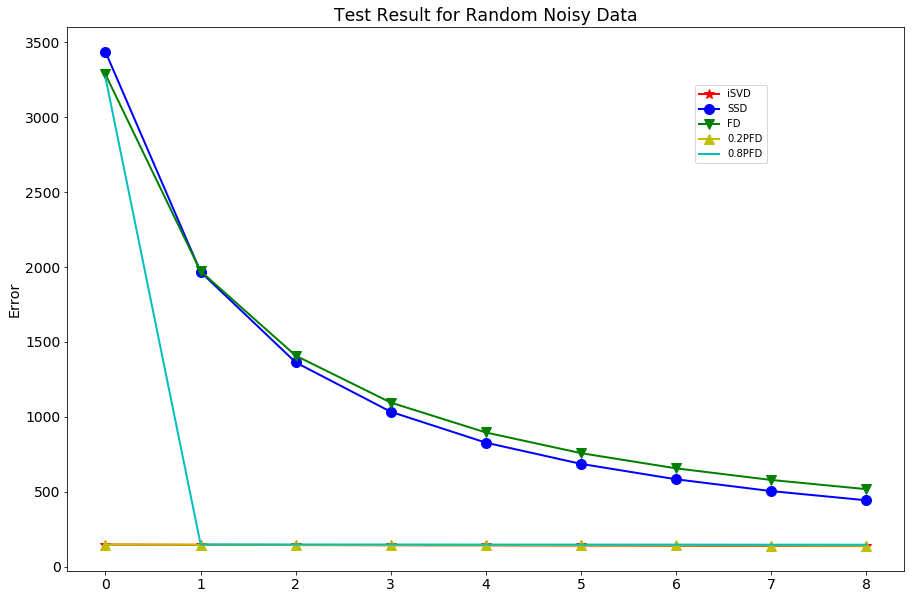

In [22]:
plt.figure(figsize=(15,10))
plt.title('Test Result for Random Noisy Data', size='xx-large')
plt.ylabel('Error', size='x-large')
plt.plot(Test1, 'r*-', markersize=10, linewidth=2, label='iSVD')
plt.plot(Test2, 'bo-', markersize=10, linewidth=2, label='SSD')
plt.plot(Test3, 'gv-', markersize=10, linewidth=2, label='FD')
plt.plot(Test4, 'y^-', markersize=10, linewidth=2, label='0.2PFD')
plt.plot(Test5, 'c,-', markersize=10, linewidth=2, label='0.8PFD')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=(0.75,0.75), scatterpoints=1)